# **Problem Statement**

## Objective:
The primary objective is to provide insights into the factors influencing employee attrition and to predict which employees are likely to leave the company.

## Business Context:
Acme Corporation, a leading tech company, is experiencing a high rate of employee turnover, which adversely affects team dynamics, project continuity, and overall company morale. Addressing this issue is crucial for maintaining a stable and productive workforce. By leveraging data analytics and machine learning, Acme Corporation aims to understand the key factors driving employee attrition and develop predictive models to identify employees at risk of leaving. This can help in taking proactive measures to improve employee retention.



## Specific Goals:

*   Identify the key factors that contribute to employee attrition at Acme Corporation.
*   Develop a predictive model to accurately forecast which employees are likely to leave the company.
*   Provide actionable insights and recommendations to the HR department to help reduce employee turnover.



# **Hypothesis Generation**

## Initial Hypotheses:


*   Employees with low job satisfaction are more likely to leave the company.
*   Employees who frequently travel for business may experience higher levels of stress and are more likely to leave.
*   Higher monthly income and better work-life balance are negatively correlated with attrition rates.
*   Employees with fewer years at the company or in their current role are more likely to leave.
*   Employees who do not work overtime are less likely to leave the company.
*   Poor relationships with managers increase the likelihood of attrition.



## Potential Factors:
Demographics:
* Age
* Gender
* Marital Status
Job Characteristics:

* Job Role
* Job Level
* Department
* Distance From Home
* Business Travel Frequency

Satisfaction Levels:

* Job Satisfaction
* Environment Satisfaction
* Relationship Satisfaction
* Work-Life Balance

Performance Metrics:

* Performance Rating
* Training Times Last Year
* Years Since Last Promotion

Compensation and Benefits:

* Monthly Income
* Stock Option Level

Tenure:

* Total Working Years
* Years At Company
* Years In Current Role
* Years With Current Manager

# **Import Libraries**

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [197]:
dataset=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# **Data Exploration**

In [198]:
#display the first 10 rows
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [199]:
#I used this to display all columns
pd.set_option('display.max_columns',None)

In [200]:
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [201]:
# Display the last 10 rows of the dataframe to get an idea of the data
dataset.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [202]:
# The first element of the tuple is the number of rows (samples)
# The second element of the tuple is the number of columns (features)
dataset.shape

(1470, 35)

In [203]:
#provides a concise summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


**Observations:**


*   Our dataset contains 1470 rows and 35 columns.
*   We 26 samples as integers and 9 object (string)---->we must encode this labels before use them in the machine learning operations .
*   The good thing is our dataset contains no missing value

## Check for Missing values

In [204]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Check for Duplicates

In [205]:
print('Our dataset contains: ' + str(dataset.duplicated().sum()) + ' duplicates')

Our dataset contains: 0 duplicates


## Find columns with Unique Value and Drop them


In [206]:
df = pd.DataFrame(dataset)

# Compute the number of unique values for each column
unique_counts = df.nunique()
# Filter columns with only one unique value
columns_with_one_unique_value = unique_counts[unique_counts == 1].index.tolist()

print("Columns with one unique value:", columns_with_one_unique_value)

Columns with one unique value: ['EmployeeCount', 'Over18', 'StandardHours']


In [207]:
# drop unique column values
dataset.drop(columns_with_one_unique_value,axis=1,inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [208]:
dataset.info() #we have 8 objects ,so we must use label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Check for correlation

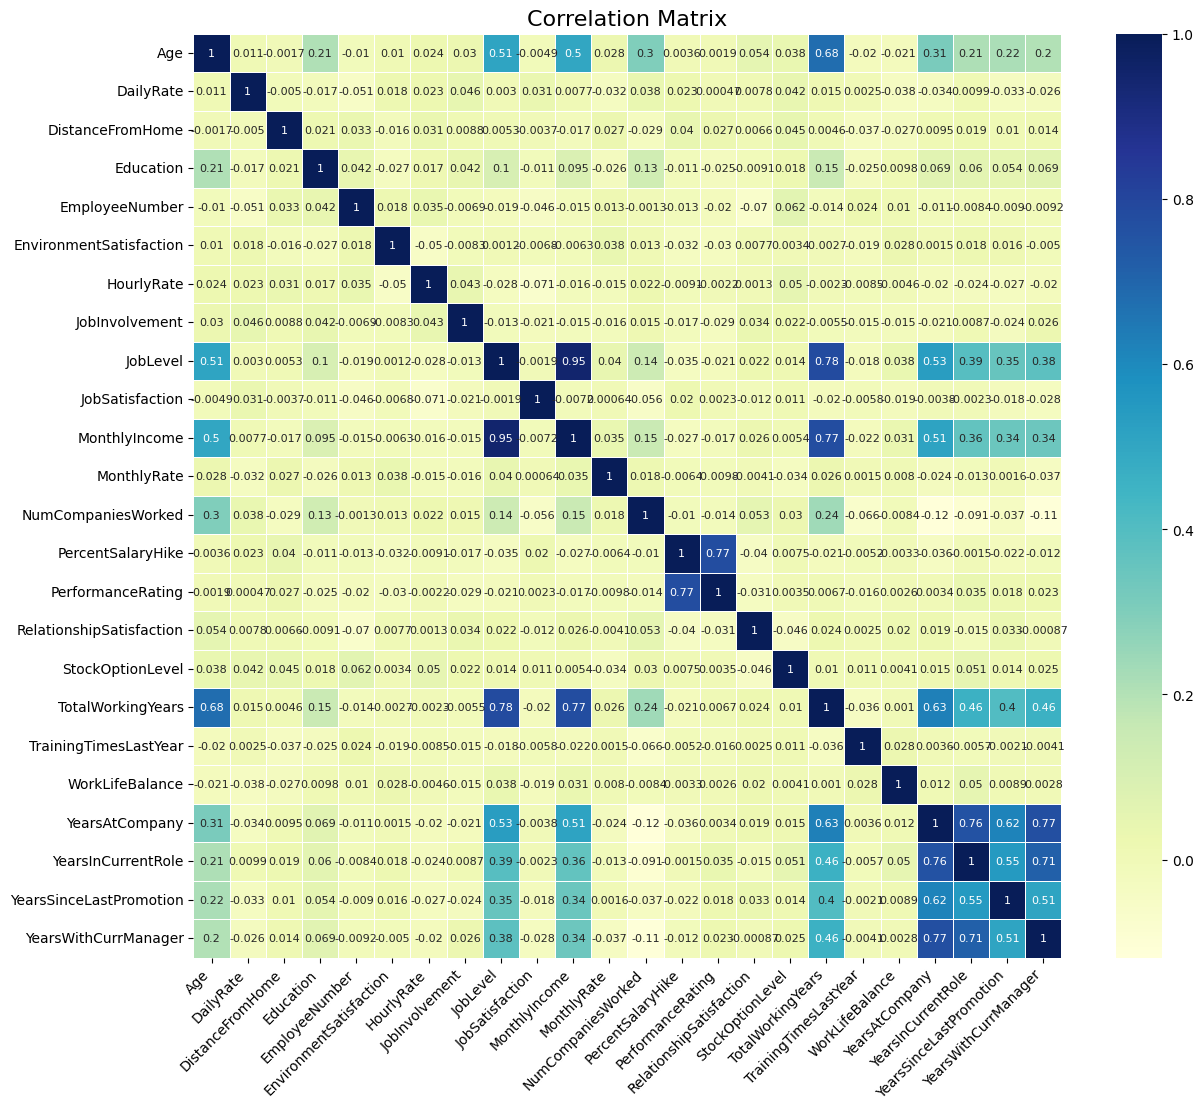

In [209]:
numeric_dataset = dataset.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_dataset.corr()
# Display the correlation matrix
plt.figure(figsize=(14, 12))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, annot_kws={"size": 8})  # Decrease annotation font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.title('Correlation Matrix', fontsize=16)  # Increase title font size
plt.show()

In [210]:
dataset.drop(["JobLevel","TotalWorkingYears","YearsWithCurrManager"],axis=1,inplace=True)

In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Check outliers

In [212]:
# Step 2: Calculate IQR and identify outliers
outliers = {}
for column in dataset.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column].values
# Print the identified outliers for each column
for column, outlier_values in outliers.items():
    print(f'{column} outliers: {outlier_values}')


Age outliers: []
DailyRate outliers: []
DistanceFromHome outliers: []
Education outliers: []
EmployeeNumber outliers: []
EnvironmentSatisfaction outliers: []
HourlyRate outliers: []
JobInvolvement outliers: []
JobSatisfaction outliers: []
MonthlyIncome outliers: [19094 18947 19545 18740 18844 18172 17328 16959 19537 17181 19926 19033
 18722 19999 16792 19232 19517 19068 19202 19436 16872 19045 19144 17584
 18665 17068 19272 18300 16659 19406 19197 19566 18041 17046 17861 16835
 16595 19502 18200 16627 19513 19141 19189 16856 19859 18430 17639 16752
 19246 17159 17924 17099 17444 17399 19419 18303 19973 19845 17650 19237
 19627 16756 17665 16885 17465 19626 19943 18606 17048 17856 19081 17779
 19740 18711 18265 18213 18824 18789 19847 19190 18061 17123 16880 17861
 19187 19717 16799 17328 19701 17169 16598 17007 16606 19586 19331 19613
 17567 19049 19658 17426 17603 16704 19833 19038 19328 19392 19665 16823
 17174 17875 19161 19636 19431 18880]
MonthlyRate outliers: []
NumCompaniesWorke

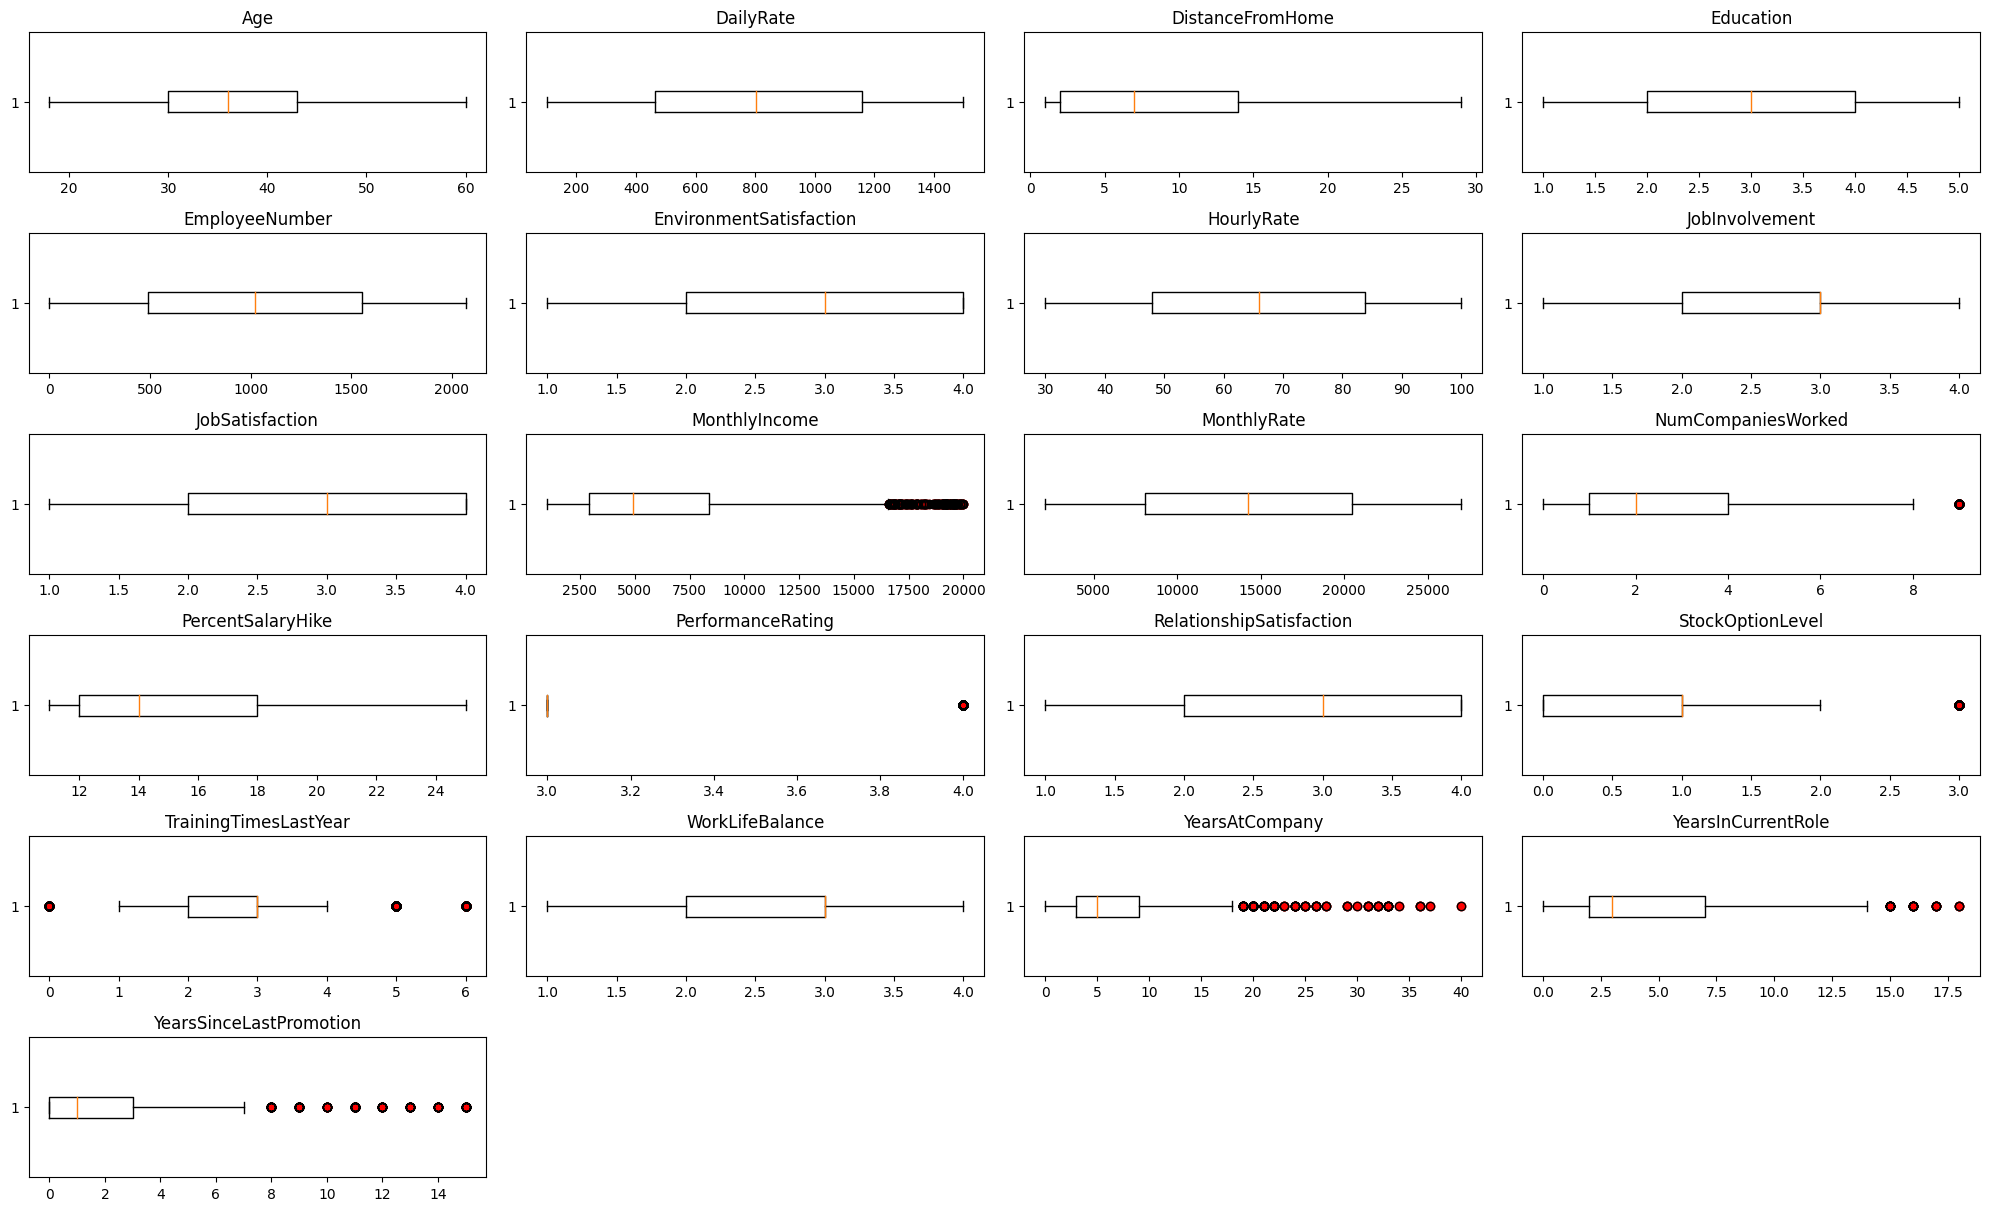

In [213]:
# Step 3: Visualize using box plots
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 16))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(dataset[column], vert=False)
    axes[i].set_title(column)
    outlier_points = outliers[column]
    if len(outlier_points) > 0:
        axes[i].scatter(outlier_points, np.ones(len(outlier_points)), color='red')

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [214]:

for column in dataset.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column].values
    dataset[column] = np.where(dataset[column] < lower_bound, lower_bound, dataset[column])
    dataset[column] = np.where(dataset[column] > upper_bound, upper_bound, dataset[column])



In [215]:
#Check if anny Outliers
# Step 2: Calculate IQR and identify outliers
outliers = {}
for column in dataset.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column].values
# Print the identified outliers for each column
for column, outlier_values in outliers.items():
    print(f'{column} outliers: {outlier_values}')


Age outliers: []
DailyRate outliers: []
DistanceFromHome outliers: []
Education outliers: []
EmployeeNumber outliers: []
EnvironmentSatisfaction outliers: []
HourlyRate outliers: []
JobInvolvement outliers: []
JobSatisfaction outliers: []
MonthlyIncome outliers: []
MonthlyRate outliers: []
NumCompaniesWorked outliers: []
PercentSalaryHike outliers: []
PerformanceRating outliers: []
RelationshipSatisfaction outliers: []
StockOptionLevel outliers: []
TrainingTimesLastYear outliers: []
WorkLifeBalance outliers: []
YearsAtCompany outliers: []
YearsInCurrentRole outliers: []
YearsSinceLastPromotion outliers: []


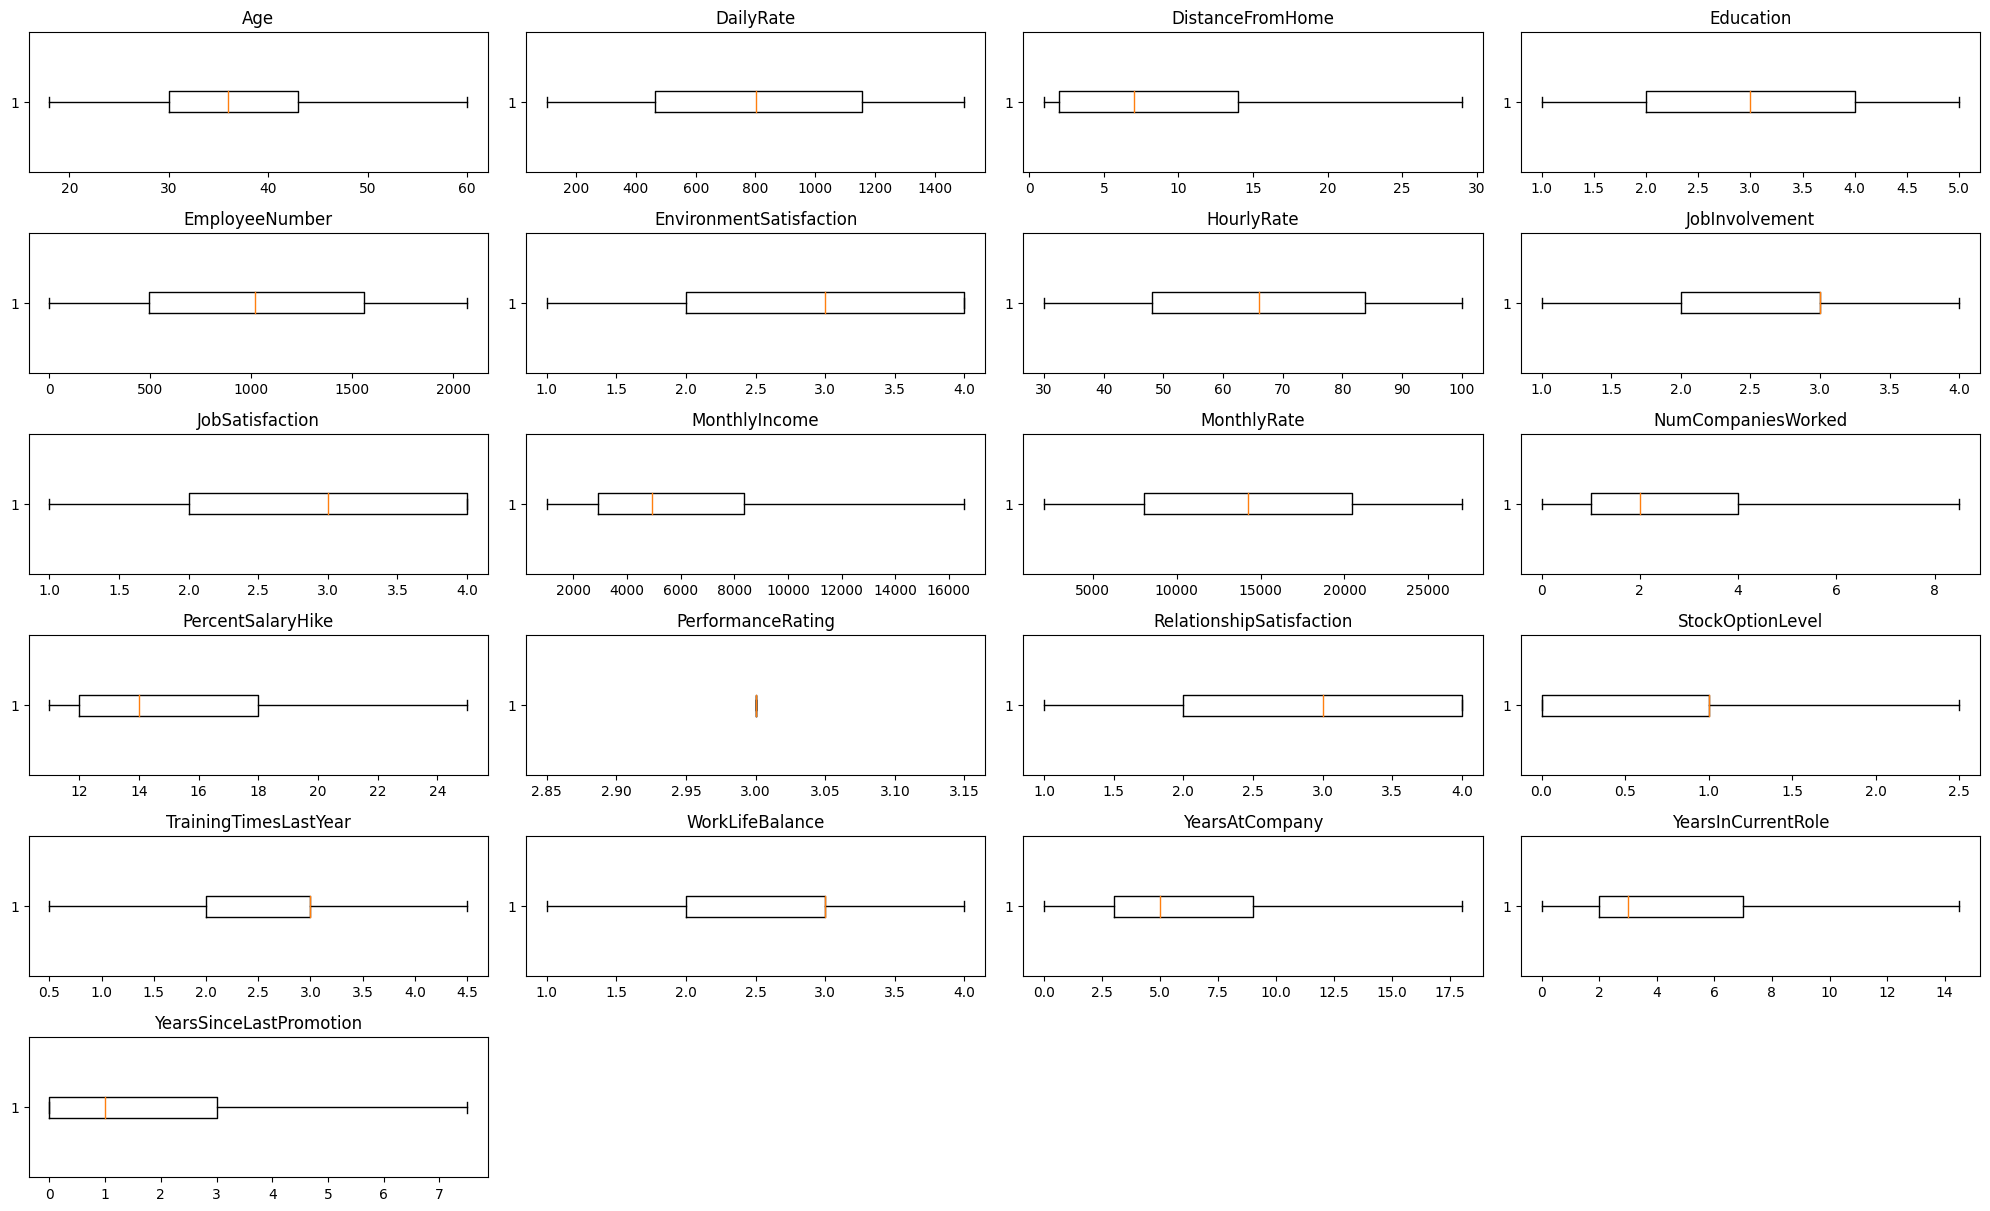

In [216]:
# Step 3: Visualize using box plots
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 16))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(dataset[column], vert=False)
    axes[i].set_title(column)
    outlier_points = outliers[column]
    if len(outlier_points) > 0:
        axes[i].scatter(outlier_points, np.ones(len(outlier_points)), color='red')

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [217]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,Female,94.0,3.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,0.5,1.0,6.0,4.0,0.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,2.0,3.0,Male,61.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,No,23.0,3.0,4.0,1.0,3.0,3.0,10.0,7.0,1.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,4.0,Male,92.0,2.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Yes,15.0,3.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,5.0,4.0,Female,56.0,3.0,Research Scientist,3.0,Married,2909.0,23159.0,1.0,Yes,11.0,3.0,3.0,0.0,3.0,3.0,8.0,7.0,3.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,7.0,1.0,Male,40.0,3.0,Laboratory Technician,2.0,Married,3468.0,16632.0,8.5,No,12.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,2.0


## Data Description

In [218]:
dataset.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1024.865306,2.721769,NaN,65.891156,2.729932,NaN,2.728571,NaN,6361.891837,14313.103401,2.675510,NaN,15.209524,3.0,2.712245,0.764966,2.710884,2.761224,6.617687,4.207823,1.922789
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,602.024335,1.093082,NaN,20.329428,0.711561,NaN,1.102846,NaN,4353.345470,7117.786044,2.454656,NaN,3.659938,0.0,1.081209,0.782312,1.037954,0.706476,4.989788,3.555335,2.478222
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,30.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.0,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,491.250000,2.000000,NaN,48.000000,2.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,3.0,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1020.500000,3.000000,NaN,66.000000,3.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,3.0,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1555.750000,4.000000,NaN,83.750000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,3.0,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,3.000000


In [219]:
dataset.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          

## Target Variable Analysis

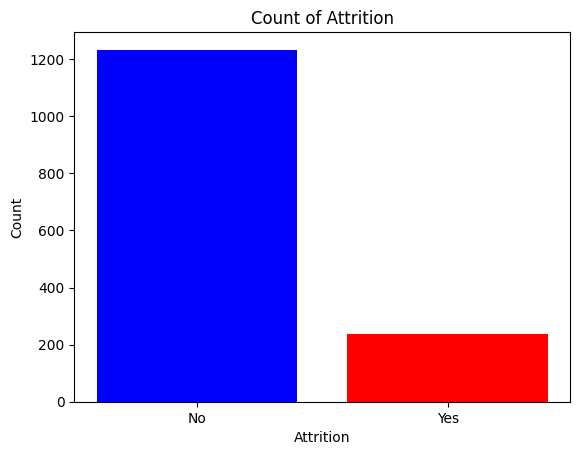

In [220]:
# Count the occurrences of each category in the 'Attrition' column
attrition_counts = dataset['Attrition'].value_counts()
# Define colors for the bars
colors = ['blue' if label == 'No' else 'red' for label in attrition_counts.index]
# Create a bar plot
plt.bar(attrition_counts.index, attrition_counts.values,color=colors)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Count of Attrition')

# Show the plot
plt.show()

**Observation:**
 * Target column isImbalanced, we need to balance the data by using the Resampling Method (Under/over).


## Exploratory Data Analysis

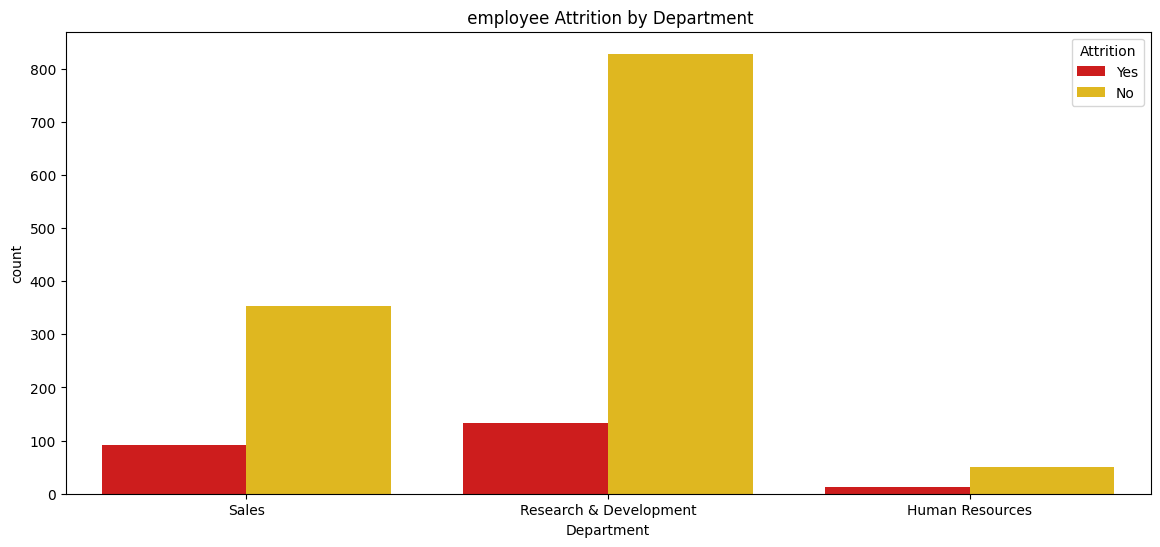

In [221]:
plt.figure(figsize=(14,6))
sns.countplot(x='Department',hue='Attrition',data=dataset,palette='hot')
plt.title(' employee Attrition by Department')
plt.show()

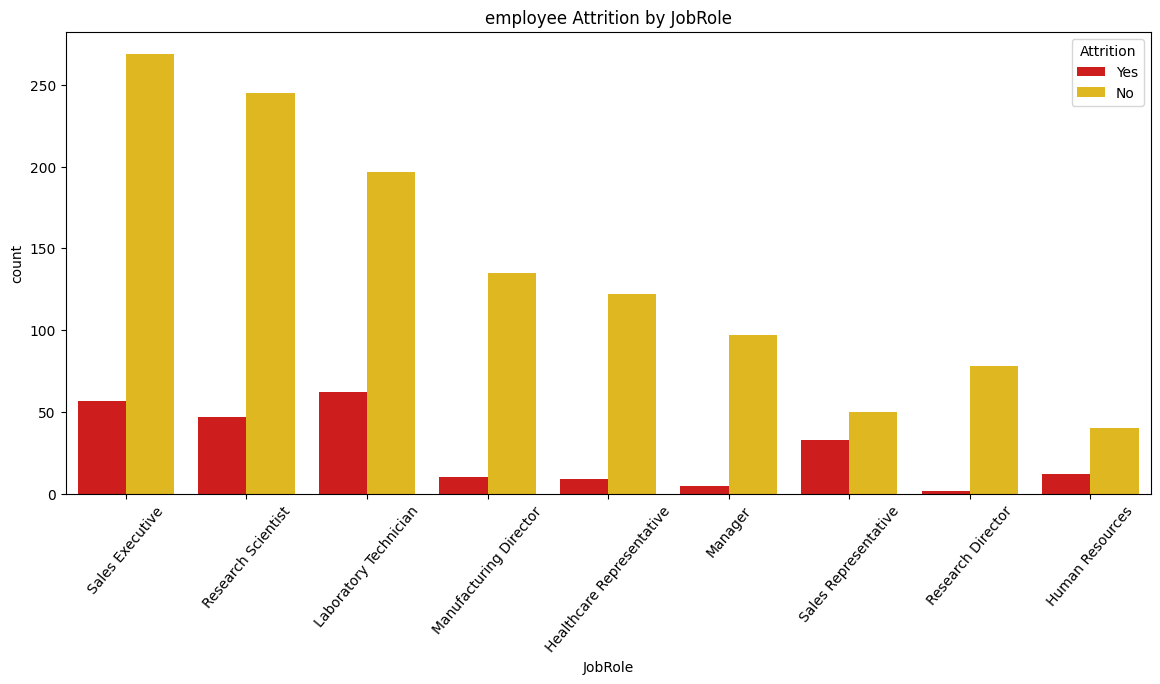

In [222]:
plt.figure(figsize=(14,6))
sns.countplot(x='JobRole',hue='Attrition',data=dataset,palette='hot')
plt.title('employee Attrition by JobRole')
plt.xticks(rotation=50)
plt.show()

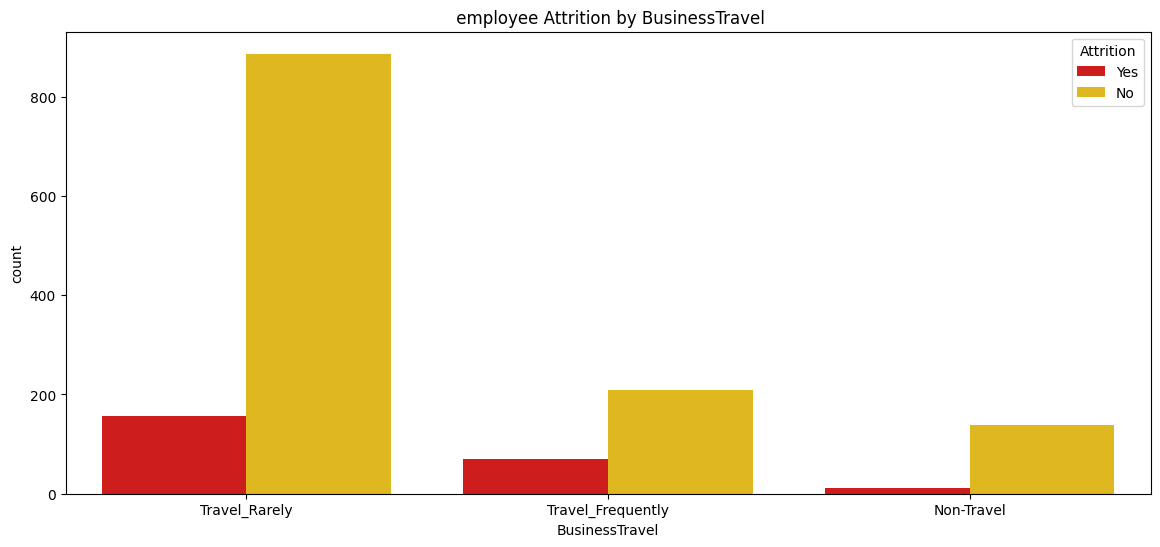

In [223]:
plt.figure(figsize=(14,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=dataset,palette='hot')
plt.title(' employee Attrition by BusinessTravel')
plt.show()

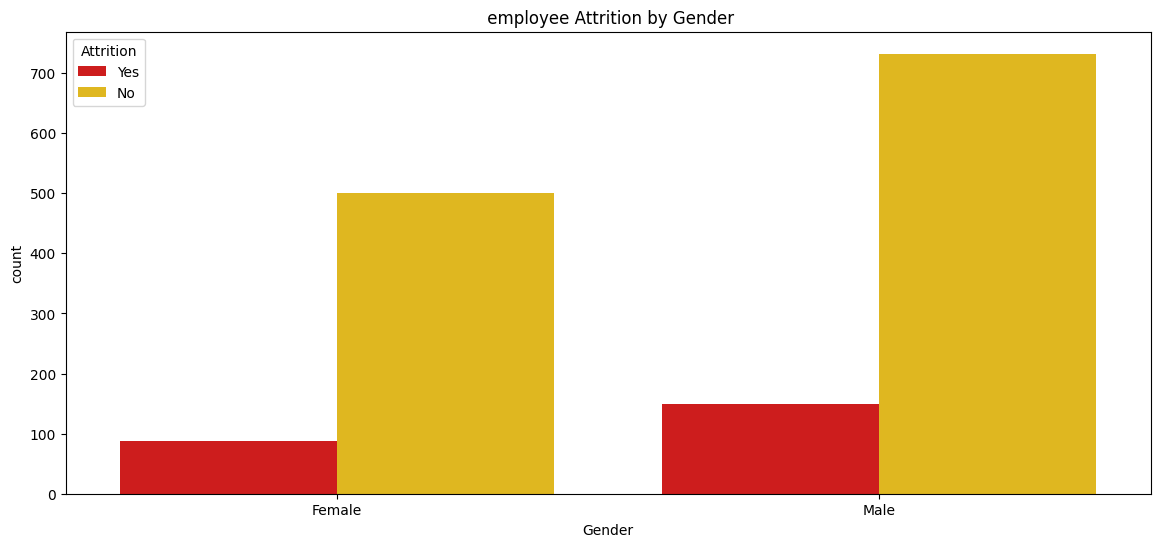

In [224]:
plt.figure(figsize=(14,6))
sns.countplot(x='Gender',hue='Attrition',data=dataset,palette='hot')
plt.title(' employee Attrition by Gender')
plt.show()

In [225]:
dataset['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [226]:
dataset.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64

**Observations:**


*   Out of 588 female employees, 87 have left the company, while 501 have stayed.
*   Out of 882 male employees, 150 have left the company, while 732 have stayed.
*   The attrition rate among female employees is approximately
87/588≈14.8%
*   The attrition rate among male employees is approximately
150/882≈17%
*The absolute number of male employees who left the company (150) is higher than the number of female employees who left (87), but this is also due to the higher number of male employees overall.




# **Data Preprocessing**

In [227]:
dataset.info() #we have 8 objects ,so we must use label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   float64
 13  JobRole                   1470 non-null   object 
 14  JobSatis

## Label Encoding

In [228]:
#Target Variable
dataset['Attrition']=dataset['Attrition'].map({'Yes':1,'No':0})
# Gender
dataset['Gender']=dataset['Gender'].map({'Male':0,'Female':1})
# OverTime
dataset['OverTime']=dataset['OverTime'].map({'Yes':1,'No':0})

In [229]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   int64  
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   float64
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [230]:
#Encode other categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dataset.columns:
    if dataset[i].dtype=='object':
        dataset[i]=le.fit_transform(dataset[i])
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,2.0,1,94.0,3.0,7,4.0,2,5993.0,19479.0,8.0,1,11.0,3.0,1.0,0.0,0.5,1.0,6.0,4.0,0.0
1,49.0,0,1,279.0,1,8.0,1.0,1,2.0,3.0,0,61.0,2.0,6,2.0,1,5130.0,24907.0,1.0,0,23.0,3.0,4.0,1.0,3.0,3.0,10.0,7.0,1.0
2,37.0,1,2,1373.0,1,2.0,2.0,4,4.0,4.0,0,92.0,2.0,2,3.0,2,2090.0,2396.0,6.0,1,15.0,3.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0
3,33.0,0,1,1392.0,1,3.0,4.0,1,5.0,4.0,1,56.0,3.0,6,3.0,1,2909.0,23159.0,1.0,1,11.0,3.0,3.0,0.0,3.0,3.0,8.0,7.0,3.0
4,27.0,0,2,591.0,1,2.0,1.0,3,7.0,1.0,0,40.0,3.0,2,2.0,1,3468.0,16632.0,8.5,0,12.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,2.0


In [231]:
dataset.dtypes

Age                         float64
Attrition                     int64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          

**Note:**


*   Now all labels have an integer type ,so we can start build the model


## Feature Scalng

In [232]:
from sklearn.preprocessing import StandardScaler
# Columns to standardize
columns_to_standardize = ['MonthlyIncome', 'MonthlyRate', 'DailyRate']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns
dataset[columns_to_standardize] = scaler.fit_transform(dataset[columns_to_standardize])

# Display the first few rows of the transformed DataFrame
print("Standardized Data:")
print(dataset.head())

Standardized Data:
    Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  41.0          1               2   0.742527           2               1.0   
1  49.0          0               1  -1.297775           1               8.0   
2  37.0          1               2   1.414363           1               2.0   
3  33.0          0               1   1.461466           1               3.0   
4  27.0          0               2  -0.524295           1               2.0   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  \
0        2.0               1             1.0                      2.0       1   
1        1.0               1             2.0                      3.0       0   
2        2.0               4             4.0                      4.0       0   
3        4.0               1             5.0                      4.0       1   
4        1.0               3             7.0                      1.0       0   

   HourlyRate  JobI

# **Machine Learning**

## Splitting the Dataset into Features & Target

In [233]:
#Features
X=dataset.drop('Attrition',axis=1)
# Target Variable
y=dataset['Attrition'].values

In [234]:
print(X)

       Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     41.0               2   0.742527           2               1.0   
1     49.0               1  -1.297775           1               8.0   
2     37.0               2   1.414363           1               2.0   
3     33.0               1   1.461466           1               3.0   
4     27.0               2  -0.524295           1               2.0   
...    ...             ...        ...         ...               ...   
1465  36.0               1   0.202082           1              23.0   
1466  39.0               2  -0.469754           1               6.0   
1467  27.0               2  -1.605183           1               4.0   
1468  49.0               1   0.546677           2               2.0   
1469  34.0               2  -0.432568           1               8.0   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0           2.0               1             1.0                      2.

In [235]:
print(y)

[1 0 1 ... 0 0 0]


## Data Resampling

Note:
*  We have a smaller dataset ,so we don't want to lose data --->OverSampling methode

In [236]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [237]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2466 non-null   float64
 1   BusinessTravel            2466 non-null   int64  
 2   DailyRate                 2466 non-null   float64
 3   Department                2466 non-null   int64  
 4   DistanceFromHome          2466 non-null   float64
 5   Education                 2466 non-null   float64
 6   EducationField            2466 non-null   int64  
 7   EmployeeNumber            2466 non-null   float64
 8   EnvironmentSatisfaction   2466 non-null   float64
 9   Gender                    2466 non-null   int64  
 10  HourlyRate                2466 non-null   float64
 11  JobInvolvement            2466 non-null   float64
 12  JobRole                   2466 non-null   int64  
 13  JobSatisfaction           2466 non-null   float64
 14  MaritalS

In [238]:
print(y_res.size)

2466


## Splitting New dataset into Training set & Testing set

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [240]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1972, 28)
(494, 28)
(1972,)
(494,)


## Modeling

* Train Model

In [241]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

* Evaluate Model (Matrix confusion & accuracy score)

In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[237  13]
 [  8 236]]


0.9574898785425101

<Axes: >

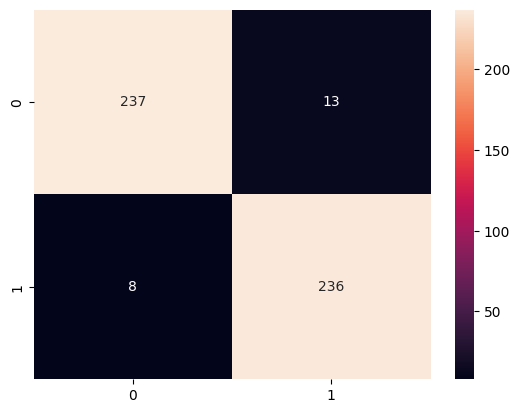

In [243]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='0.0f')

**Observations:**
* True Positives (TP): 238
* True Negatives (TN): 239
* False Positives (FP): 11
* False Negatives (FN): 6

---->The model shows strong performance with a high accuracy score and a confusion matrix indicating a good balance between correctly identified instances and misclassified ones.

In [244]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9477911646586346
Recall: 0.9672131147540983
F1 Score: 0.9574036511156186


**Notes:**
*  Precision: About 95.58% of the instances predicted as positive are actually positive.
* Recall: About 97.54% of the actual positive instances are correctly identified by the model.
* F1 Score: The harmonic mean of precision and recall is approximately 96.55%, indicating a good balance between precision and recall.